# Introduction

Hi guys, In this chapter we will talk about Variational autoencoders (VAE). We will learn some theory about that and some application implementation too. Variational autoencoders are mostly similar to other autoencoders we have learned in previous chapter. It consist of similar encoder decoder architecture; where Encoder converts input data into latent space and decoder converts it back to the original (reconstruction) form. We measure the performance of autoencoders using mean square loss function. 

In case of VAE above procedure will be twisted. We will create some encoder decoder architecture similar to the autoencoders we had seen but we will manipulate the latent space to use it for generation of new data instead of just reconstruction.

So a VAE can not only reconstructs images but also generate new images. This leads us towards some interesting applications like false data generation for training when there are very less training instances available. We can generate not only images but music also from the VAE. But we will limit our scope to image generation only as this course is more about computer vision than speech analytics.

We will cover following topics in this chapter:

- What are VAEs?
- How it is different than vanilla autoencoders.
- Applications of VAE
- How to use VAE for image generation.

So without wasting our time let's start our discussion.

# 3.2 What is VAE? Why we need it?

variational autoencoder or VAE are part of neural network family. These are generative networks and belongs to same family as generative adversarial networks (GANs). VAEs are similar to other autoencoders (AE) which we have discussed in previous chapter. Their architecture is similar to a conventional AE; enoder and decoder as following.

<img src='1_Vanilla-Autoencoder.png' width=400>

Where encoder (left side of network) encodes data into lower dimensions than input; and decoder (right side of the network) decodes the encoded data and try to reconstruct the original input at the output layer of the network. VAE also does the same; but with some twist!

Well the problem with vanilla autoencoders starts when we try to reconstruct an input which looks different than training data. As it does not know anything about this input; It generates some ridiculous reconstructions of the input. Other important point is; it can not reconstruct any kind of variations of the input data. For example we If we feed our AE with an image of digit zero with very thin boundaries and wants to generate an image of the same digit but with a thicker boundary; we can not do so; our AE will generate the similar image as the input. But why it will do this? Because We have not trained it for handling variations! It does not know how to generate variations. But you have seen it could help us to remove noise from the images. Can we do better than that? 

One problem with vanilla AE is it does not create a continuous latent space. we can understand it with example of MNIST digit reconstruction. when we train an AE for digit reconstruction it learns a discrete latent space as following.

<img src='3_vanilla_latent.png' width=400>

Now suppose we want to generate a variation of digit zero with thicker boundary as following; 

<img src='4_1_zero.png' width=400>

Our vanilla autoencoder is unable to do generate the desired results, as it can not learn the representations which are not present in the training data. Similarly when we try to generate any digit variation which present somewhere between two different latent distributions, vanilla AE will fail to generate that. 

What do you think; can we train an autoencoder to generate different variations of the same input?     

## 3.2.1 How VAE works?

Well, VAE could be a solution to generate variations of the input data. VAE uses probability statistics to do so. How? well, its bit complex; let's try to understand by following figure.

<img src='2_vae.png' width=600>

*image source: https://www.renom.jp/notebooks/tutorial/generative-model/VAE/notebook.htmls*

As you can see in above figure, left side of shows a vanilla AE and right side shows VAE. We will talk about the right side in detail. As you can see the architecture of a VAE is very much similar; left side of VAE is an encoder while right side is a decoder network; while layers present in the middle of the encoder and decoder are different. And here is the twist. VAE first converts input into latent (hidden) space now instead feeding latent variables to the decoder it creates two vectors from latent variable; one for learning mean and other one for learning standard deviation of an unknown distribution. These two parameters are trainable parameters which could be learned during training of the network. Next, we will use these variables to draw samples from a normal (gaussian) distribution by random sampling so that we always get different samples even for the same mean and standard deviation. Generated samples will feed into the decoder to reconstruct the input variable at the output layer of the network. 

**Wait! but, why the hell we are doing this?**

Well; This is bit technical. and you need to have some patience to understand this. The mean variable which AE learns; controls the center of the latent variable's distribution. While standard deviation controls possible variation which could present in the distribution. Now decoder needs to not only learn about the type of encoding (represented by mean) but its variations (represented by deviation) also. This allows the decoder to learn a continuous latent space which enable to generate infinite types of variations at the output. The most interesting part in here is; Once our AE get trained, we will only need the decoder part of the network to generate new data points using desired mean and variance. Have you got anything? anything at all? 

Let's try to understand this process in following example.

Suppose we are training an autoencoder to generate a hand written digits data. During training it will automatically create different clusters (in latent space) for similar looking digits such that cluster-0 will represent all the feature variations present in digit zero. Similarly cluster-1 to cluster-9 will have representation of different digits. Center of these cluster will be mean of the distribution presents in the corresponding digit and standard deviation will tells us how much different variations of the digit present in the data. Now by changing the mean and standard deviation from outside (using random normal sampling); this AE can learn those representations too, which are not already present in the training data set. 

## 3.2.2 Difference between Vanilla AE and VAE

Following figure will give you institution about the difference between vanilla AE's latent space and VAE's latent space.

<img src='5_Latent_Space.png' width=600>

Left side of the figure shows vanilla AE's latent space. M-1, M-2 and M-3 are the mean of the distribution for 3 different digits. Here you can easily see that AE will not learn any variation of the digit as the space is very discrete in nature. While right side of the figure shows latent space for a VAE; here you can see the V-1, V-2 and V-3 are the variation of the distribution which will be learned during traing of the AE. So by controlling mean value we can generate a specific digit; while controlling variance will generate different variation of the digit. 

Thats it! I think now the difference between vanilla AE and VAE is cleared to you guys. If you still have some doubts, it will be cleared during the implementation of VAE.

Now let's see some interesting applications of VAE.

# 3.3 Applications of VAE

Now as you already know that, variational autoencoders are very good choice for data generation we can use them in following applications:

- **Data Augmentation:** Deep learning requires lot of training data to train the network. Medical imaging is one of the domain which always face scarcity of data. For example if we want to create a network which can detect lung cancer in images; In such scenarios there are always class imbalance found. You will get more normal images than infected ones. Here VAE could be very helpful to generate fake infected images to train the classifier.


- **Image generation:** Now as you already know that we can use autoencoders for image generation/reconstruction. VAE's are very helpful in synthetic image generation tasks. We can generate faces and objects using VAEs even we can control the appearance of the faces and objects. If you want to generate a face with the glasses you can do that using VAE. We will be working on this application in some time.


- **Music synthesis:** VAEs can be also used for time series of sequential data such as audio/speech or texts. You can train a VAE for music creation and believe me these are algorithms are very good in doing it. 


- **Style Transfer:** Similar to generative adversarial nets; VAE can also be used for style transfer. This is one of the interesting application of the VAE. You can transfer color gradings from one image to another using VAEs.   

# 3.4 VAE for image generation

In computers until you program anything by yourself, its difficult to understand and remember it clearly. Now we will implement a simple VAE for our classic problem of MNIST digit generation. We will use keras and tensorflow libraries for neural network creation and optimization. so without wasting any time let's jump straight to it.

Following snippet will import all the required library packages to create and train VAE.

In [1]:
# numpy for matrix calculations 
import numpy as np

# matplotlib to plot distributions
import matplotlib.pyplot as plt

# to mimic normal sampling we will use scipy's norm functionss
from scipy.stats import norm

# Keras to create the network and train it. we will also import the data set from keras.
from keras.layers import Input, Dense, Lambda, Layer
from keras.models import Model
from keras import backend as K
from keras import metrics
from keras.datasets import mnist
import _pickle as pickle

Using TensorFlow backend.


we will create a simple neural network which will contain:

- an encoder with single dense layer with 512 neurons.
- two dense layers to calculate mean and standard deviation of the latent space with 3 neurons
- one sampling layer to create random samples using mean and standard deviation
- a decoder with single dense layer with 512 neurons.
- an output dense layer with the dimension same as the input dimension. 

Let's implement the architecture stepby step.

First we will define hyper-parameters to create the network. 

In [3]:
# hyper parameters
batch_size = 256
original_dim = 784
latent_dim = 3
intermediate_dim = 512
epochs = 50
epsilon_std = 1.0

let's create encoder part first

In [4]:
# encoder architecture
x = Input(shape=(original_dim,))
encoder_h = Dense(intermediate_dim, activation='relu')(x)

# Mean and standard deviation of the distribution
z_mean = Dense(latent_dim)(encoder_h)
z_log_var = Dense(latent_dim)(encoder_h)

now the sampling function. this function will create random samples with defined mean and standard deviation. after creation of samples decoder layer will be added.

In [5]:
# sampling layer from latent distribution
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=epsilon_std)
    return z_mean + K.exp(z_log_var / 2) * epsilon

To add this function to the network, we will use lambda layer. Lambda layer can be used to create and add any custom layer to  the network. 

In [6]:
#z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])
z = Lambda(sampling)([z_mean, z_log_var])

Following lines will create decoder and output layer of the network.

In [7]:
# decoder / generator architecture
decoder_h = Dense(intermediate_dim, activation='relu')
decoder_mean = Dense(original_dim, activation='sigmoid')
h_decoded = decoder_h(z)
x_decoded_mean = decoder_mean(h_decoded)

So what else left now? We have our encoder; sampling layer and decoder! we are ready to train our autoencoder! 

No; we are not ready yet. don't forget to train any neural network we need to have a loss function to optimize. VAEs are not different. We need to choose a loss function to train a VAE. So what's the problem in that, let's use the same mean square error to train the network.

And here is one more twist guys. as our network is not similar to a conventional autoencoder, we need to carefully choose loss function for our autoencoder. As we have discussed earlier in the chapter that we do not want a discrete latent space from the autoencoder; so that we can generate samples with different kind of variations easily. in other words we want a latent space where the cluster distance for different digit is very small! that means we want a loss function which can drive the latent space to have less divergence between different distributions (Digits). 

Cross-entropy is one of the loss metrics which can tell us similarity between two distributions and Kullback-Leibler (KL) divergence is other one metric which can tell us divergence between different distributions. we will create a custom loss function which will be combination of both these losses. When network tries to minimize this loss; it will apparently create a latent space with very close clusters. For VAEs, the KL loss is equivalent to the sum of all the KL divergences between the component $X_i $~$ N(μ_i, σ_i²)$ in $X$, and the standard normal (gaussian distribution). It’s minimized when $μ_i$ = 0, $σ_i$ = 1.

we can write binary cross-entropy loss as following:

<img src='6_Binary_Cross_Entropy.png'>

here $y$ is the label and $p(y)$ is probability of $y$. $N$ is the number of samples. So it is nothing but sum of all the probabilities of corresponding label. if you will look closely there is a negative sign before the formula; it is there because log of between 0 to 1 is a negative value.

And following is the formula of KL divergence loss.

<img src='7_KL_Divergence.png' width=250>

Here $\sigma_i$ is standard deviation (square root of the variance). $\mu_i$ is the mean of the distribution. and $n$ is number of samples.

Now as you can understand cross entropy loss will force autoencoder to generate specific digit as it is difference between actal vs predicted, while KL divergence will enforce it to generate specific distribution to create variation of the digit as KL divergence will be used to optimize distribution statistics. 

We will write and add a separate layer to calculate the combined loss. It will goes as following.

In [8]:
# Custom loss layer
class CustomVariationalLayer(Layer):
    def __init__(self, **kwargs):
        self.is_placeholder = True
        super(CustomVariationalLayer, self).__init__(**kwargs)
    
    #Here we will calculate the losses
    def vae_loss(self, x, x_decoded_mean):
        #Binary cross-entropy first
        xent_loss = original_dim * metrics.binary_crossentropy(x, x_decoded_mean)
        
        #Then KL divergence
        kl_loss = - 0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        
        #Return mean of the sum of losses
        return K.mean(xent_loss + kl_loss)

    def call(self, inputs):
        # From this function we can call the loss method
        x = inputs[0]
        x_decoded_mean = inputs[1]
        loss = self.vae_loss(x, x_decoded_mean)
        self.add_loss(loss, inputs=inputs)
        # We won't actually use the output.
        return x

let's add this custom layer to the network. 

In [9]:
y = CustomVariationalLayer()([x, x_decoded_mean])

Now we are ready to create our model

In [10]:
# entire vae model
vae = Model(x, y)
vae.compile(optimizer='rmsprop', loss=None)
print (vae.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 784)          0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 512)          401920      input_1[0][0]                    
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 3)            1539        dense_1[0][0]                    
__________________________________________________________________________________________________
dense_3 (Dense)                 (None, 3)            1539        dense_1[0][0]                    
__________________________________________________________________________________________________
lambda_1 (

C:\Users\ankit\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Output "custom_variational_layer_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "custom_variational_layer_1" during training.
  app.launch_new_instance()


## Try it yourself

You can change the number of neuron for the latent space. I have used 3; You should try with different numbers and observe the changes in the generated digits. simply start with minimum 2 neurons and increase up to number of your choice. more number should lead to better generation.   

Let's load the data  set into the memory and start training of the network. After loading the data, we need to reshape it as it is in form of images.

In [11]:
# load mnist dataset and preprocess
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

Time to train the network!
We will train our network with rmsprop as the optimizer. it is a customized version of gradient descent, which calculate learning rate by itself. We will fit this network for defined custom loss for 50 epochs. 

In [12]:
# training
history = vae.fit(x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, None))

# encoder to generate latent variables from input
encoder = Model(x, z_mean)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 201us/step - loss: 192.1155 - val_loss: 164.4117
Epoch 2/50
60000/60000 [==============================] - 5s 91us/step - loss: 160.3043 - val_loss: 157.2029
Epoch 3/50
60000/60000 [==============================] - 5s 91us/step - loss: 155.6139 - val_loss: 154.5534
Epoch 4/50
60000/60000 [==============================] - 5s 92us/step - loss: 153.2134 - val_loss: 152.5386
Epoch 5/50
60000/60000 [==============================] - 5s 91us/step - loss: 151.1798 - val_loss: 150.6968
Epoch 6/50
60000/60000 [==============================] - 5s 91us/step - loss: 149.5152 - val_loss: 149.5086
Epoch 7/50
60000/60000 [==============================] - 6s 93us/step - loss: 148.1654 - val_loss: 148.6940
Epoch 8/50
60000/60000 [==============================] - 6s 93us/step - loss: 147.0618 - val_loss: 147.9229
Epoch 9/50
60000/60000 [==============================] - 6s 93us/step - los

Everything looks perfect! both the losses are decreasing throughout the training session. now for generating images from VAE, we will only use decoder part of the network. for that we will create a generator which will generate the images from latent space variable. Now here is the interesting part; we can actually create some random latent variables and pass that through the generator model to check it's performance. But first we will create our generator as follows.

In [13]:
# generator to generate image from latent variables
decoder_input = Input(shape=(latent_dim,))
_h_decoded = decoder_h(decoder_input)
_x_decoded_mean = decoder_mean(_h_decoded)
generator = Model(decoder_input, _x_decoded_mean)

store all models onto the disk.

In [14]:
# save all 3 models
vae.save('./models/ld_%d_id_%d_e_%d_vae.h5' % (latent_dim, intermediate_dim, epochs))
encoder.save('./models/ld_%d_id_%d_e_%d_encoder.h5' % (latent_dim, intermediate_dim, epochs))
generator.save('./models/ld_%d_id_%d_e_%d_generator.h5' % (latent_dim, intermediate_dim, epochs))
fname = './models/ld_%d_id_%d_e_%d_history.pkl' % (latent_dim, intermediate_dim, epochs)

# save history
with open(fname, 'wb') as file_pi:
    pickle.dump(history.history, file_pi)

Now let's see how VAE's latent space looks. We will use encoder to encode the test data. as we encoder's latent dimension size is 3 we can visualize the space in a 3D scatter plot. we will use mpl toolkit to project 3d scatter plots with matplotlib.

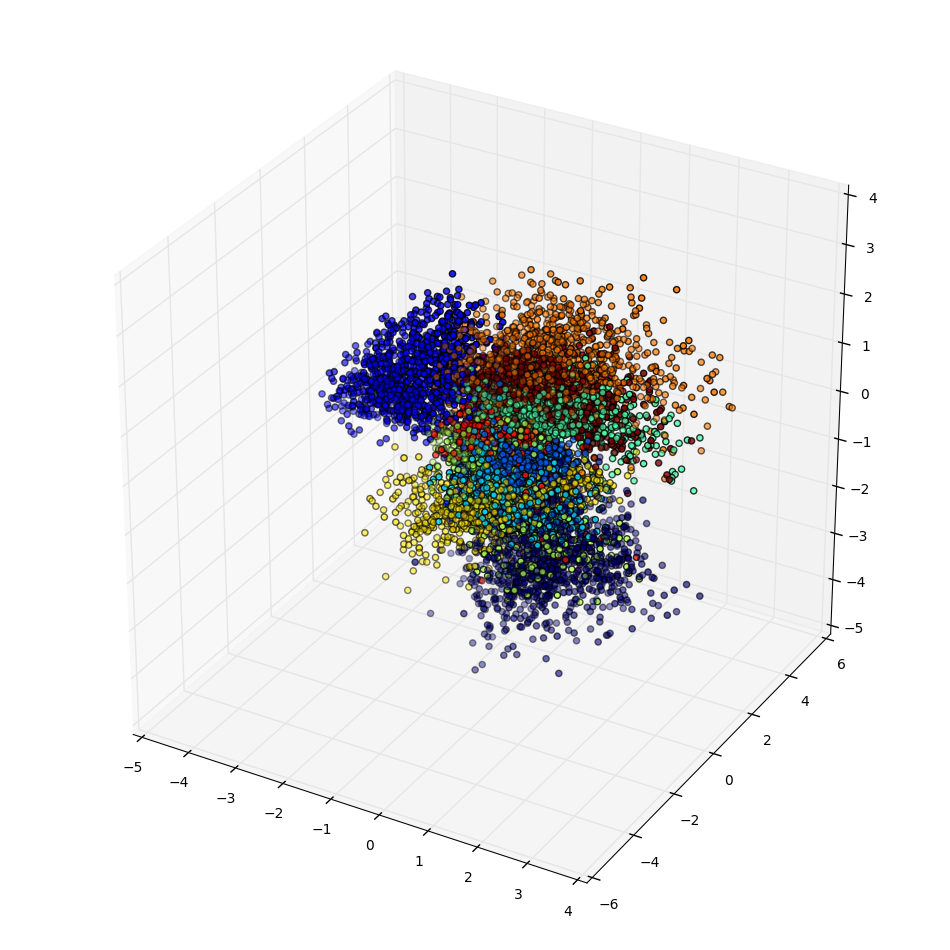

In [16]:
from mpl_toolkits.mplot3d import Axes3D
# display a 2D plot of the digit classes in the latent space
x_test_encoded = encoder.predict(x_test, batch_size=batch_size)
#plt.figure(figsize=(6, 6))
# plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1],x_test_encoded[:, 2], c=y_test)
plt.show()

Its Fascinating! Don't you think? As you can see in above figure; how this latent space clusters each digit into corresponding distribution. and if you have observed; there is very less divergence between two clusters; and thats what we wanted from the VAE! Now let's see either this decoder/generator can generate digits or not?

We will create 3 normal distributions to mimic the latent space of the encoder. And send those distributions to the generator. Generator should generate new digits using these fake latent variables.

To create normal distributions we will use scipy's norm function; it will create samples from a normal distribution with specified dimensions. 

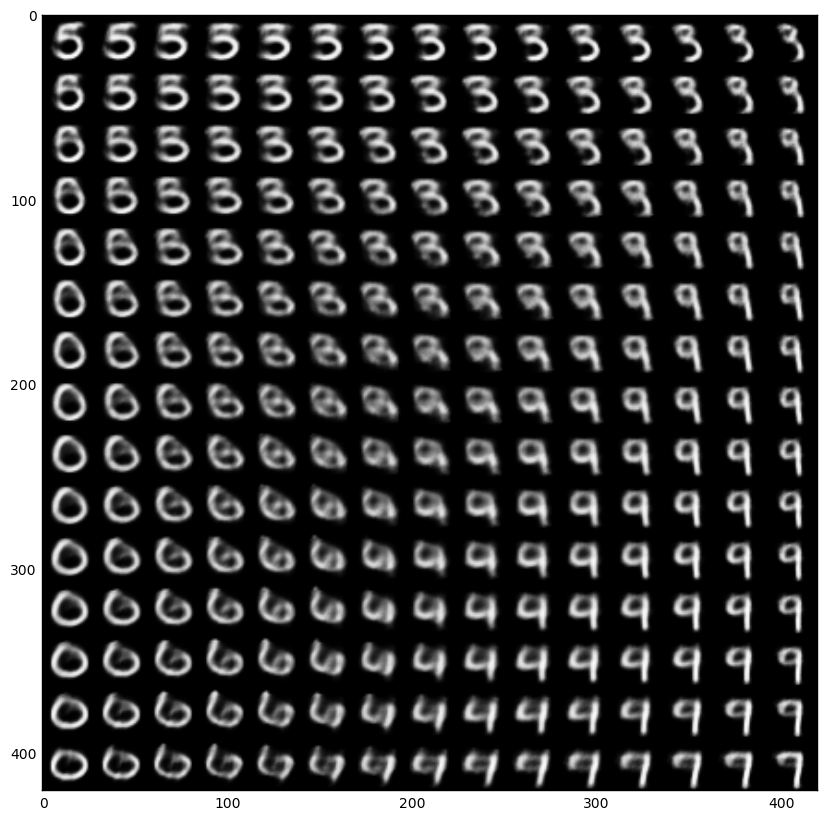

In [17]:
# display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# linearly spaced coordinates on the unit square were transformed through the inverse CDF (ppf) of the Gaussian
# to produce values of the latent variables z, since the prior of the latent space is Gaussian
grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
grid_y = norm.ppf(np.linspace(0.05, 0.95, n))
grid_z = norm.ppf(np.linspace(0.05, 0.95, n))

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        for j, zi in enumerate(grid_z):
            z_sample = np.array([[xi, yi, zi]])
            x_decoded = generator.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit
plt.figure(figsize=(10, 10))
plt.imshow(figure, cmap='Greys_r')
plt.show()

WOW! it's just awesome! believe me; I was not expecting this. We have trained a VAE for just 50 epochs and it is generating digits so realistic. Keep it in mind that these are not reconstructions of input image. These are the synthetically generated digits using a Variational autoencoder. Isn't it great! If we can generate images from a simple neural network just think what an we do with a much bigger and complex network. 

# 3.5 Summary

So we had started from general understanding of Autoencoders; we take ahead that understanding to create variational autoencoders. despite of complex maths behind the VAE; we tried to understand its working piece by piece. We have learned about latent space in more depth. 

As we move ahead in chapter, we have seen how VAEs can solve the problem of discrete latent space by taking distribution statistics into the account. We learned about; How we can create and use a custom loss layer into the network.

Then we successfully trained a VAE network for digit generation. We visualized the latent space of the encoder which promises us to less divergence between the classes. This leads to successful generation of the digits from decoder part of the network.

So thats it! for this chapter. As this chapter is difficult to understand without implementing it.I will highly encourage you guys to implement it by your own step by step. It will give you more understanding about the concept. We will again meet in next chapter. till than; Happy learning.

# Quiz

## Q1. What do you mean by variational in VAE?

- A) Variation in input data.
- B) Variation in latent space.
- C) Variation in output reconstruction.
- D) None of the above.

Ans: B) VAE creates variation in latent space to generate outputs of different variations.

## Q2. KL-divergence loss measures?

- A) Difference between input and output distribution.
- B) Difference between input and latent space distribution.
- C) Difference between output and latent space distribution.
- D) Difference between latent and sampled distribution.

Ans: D) Our task is to generate samples as close to the latent space distributions to generate images similar to the training data set.

## Q3.  Binary cross-entropy loss measures?

- A) Difference between input and output.
- B) Difference between input and latent space.
- C) Difference between output and latent space.
- D) Difference between latent and sampled.

Ans. A) Binary cross-entropy loss measures difference between input and output.